This part is pretty much done. All of the code above the "#####################################################" (including the imports) is required to make this part run. The only line which must be executed to make this run is "V,TF=genInit(x,y,nSmall,maxPot)" where x and y are the dimensions of the overall array, nSmall is the number of shapes to add randomly to the potential array and maxPot is the maximum potential applied to any of the initial arrays. The outputs are as follows: V is the initial potential array, and TF is the true/false array where points which are not initially fixed correspond to a false, and those which are initially fixed correspond to a true. See the output arrays at the end for visual examples of this.

Things to add:

1) If two objects touch they should have the same potential as each other

2) Maybe bigger or differently shaped objects? Depends on how the solved state of the system looks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

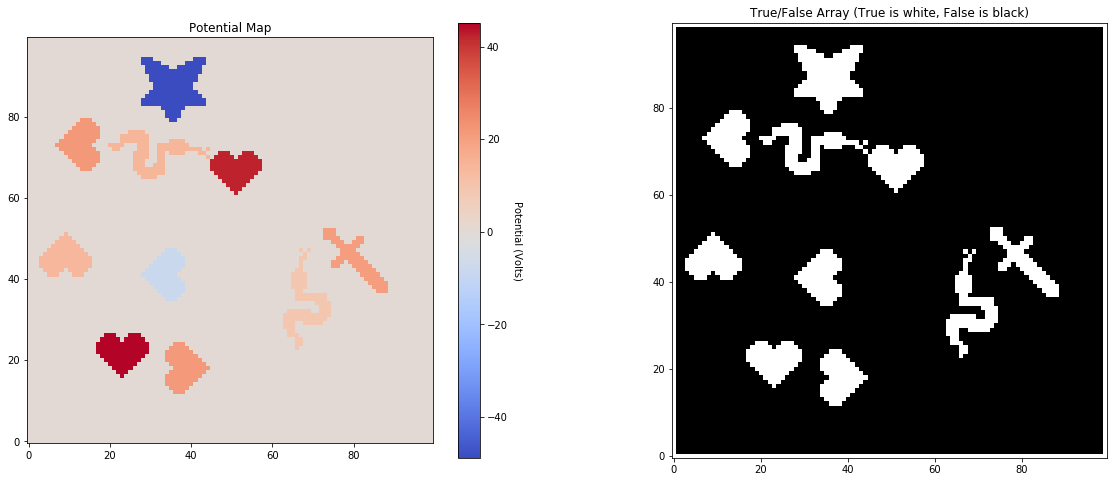

In [9]:
# 1) Create array
#   a) Dynamic size w/ all values 0
#   b) Also create true/false array w/ all but borders True at first
# 2) Use rand number generator to add smaller arrays
#   a) Make smaller array pool w/ each array having changable potentials
#   b) Make array inserter that adds potentials to potential array and makes TF array false where V!=0
# 3) Use single def to do all of this

def cArys(x,y):
    V=np.zeros((x,y))
    TF=np.ones((x,y),dtype=bool)
    Fy=np.zeros((1,y),dtype=bool)
    Fx=np.zeros((1,x),dtype=bool)
    TF[0]=TF[x-1]=Fy
    TF.T[0]=TF.T[y-1]=Fx
    return V,TF

def bgArys(ind,rot,pot):
    if ind==0:
        A=[[0,0,pot,pot,pot,0,0,0,pot,pot,pot,0,0],
           [0,pot,pot,pot,pot,pot,0,pot,pot,pot,pot,pot,0],
           [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
           [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
           [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
           [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
           [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
           [0,0,0,pot,pot,pot,pot,pot,pot,pot,0,0,0],
           [0,0,0,0,pot,pot,pot,pot,pot,0,0,0,0],
           [0,0,0,0,0,pot,pot,pot,0,0,0,0,0],
           [0,0,0,0,0,0,pot,0,0,0,0,0,0]]
        return rota(np.array(A),rot)
    if ind==1:
        A=[[0,0,0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot],
          [0,0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot],
          [0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot],
          [0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0],
          [0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0,0],
          [0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0,0,0],
          [0,0,pot,pot,0,0,0,pot,pot,pot,pot,pot,0,0,0,0],
          [0,0,pot,pot,pot,0,pot,pot,pot,pot,pot,0,0,0,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,pot,0,0,0,0,0,0],
          [0,0,0,0,pot,pot,pot,pot,pot,0,0,0,0,0,0,0],
          [0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,0,0,0,0,0,0,0],
          [0,0,pot,pot,pot,0,0,pot,pot,pot,0,0,0,0,0,0],
          [pot,pot,pot,pot,0,0,0,0,pot,pot,0,0,0,0,0,0],
          [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,0,0,0]]
        return rota(np.array(A),rot)
    if ind==2:
        A=[[0,0,0,0,0,0,0,pot,pot,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0],
          [0,0,0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0],
          [0,0,0,0,0,pot,pot,pot,pot,pot,pot,0,0,0,0,0],
          [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
          [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
          [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
          [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
          [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
          [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
          [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
          [0,pot,pot,pot,pot,pot,pot,0,0,pot,pot,pot,pot,pot,pot,0],
          [pot,pot,pot,pot,pot,0,0,0,0,0,0,pot,pot,pot,pot,pot],
          [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==3:
        A=[[0,0,0,0,0,pot,0,pot,0,0,0,0],
        [0,0,0,0,0,0,pot,0,0,0,0,0],
        [0,0,0,0,0,0,pot,pot,0,0,0,0],
        [0,0,0,0,0,0,0,pot,0,0,0,0],
        [0,0,0,0,0,0,0,pot,0,0,0,0],
        [0,0,0,0,0,0,0,pot,pot,0,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,0,pot,pot,0,0,0],
        [0,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
        [0,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
        [pot,pot,pot,pot,0,0,0,0,0,0,0,0],
        [pot,pot,pot,0,0,0,0,0,0,0,0,0],
        [pot,pot,pot,0,0,pot,pot,pot,pot,pot,pot,0],
        [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
        [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
        [0,0,pot,pot,pot,pot,pot,0,0,pot,pot,pot],
        [0,0,0,0,0,0,0,0,0,pot,pot,pot],
        [0,0,0,0,0,0,0,0,0,pot,pot,0],
        [0,0,0,0,0,0,0,0,pot,pot,pot,0],
        [0,0,0,0,0,0,0,pot,pot,0,0 ,0],
        [0,0,0,0,0,0,0,pot,pot,0,0 ,0],
        [0,0,0,0,0,0,0,0,pot,0,0 ,0]]
        return rota(np.array(A),rot)
    return False
    
def rota(A,rot):
    for n in range(0,rot):
        A=np.rot90(A)
    return A

def insrt(xi,yi,A,V,TF):
    lx,ly=np.shape(A)
    if np.all(TF[xi:xi+lx,yi:yi+ly]==True):
        V[xi:xi+lx,yi:yi+ly]=A
        TF[xi:xi+lx,yi:yi+ly]=(A==0)
        return False
    else:
        return True
        
def genInit(x,y,nSmall,minPot,maxPot):
    V,TF=cArys(x,y)
    for n in range(nSmall):
        check=True
        while check:
            ind=rand.randint(0,3)
            rot=rand.randint(0,3)
            pot=rand.uniform(minPot,maxPot)
            A=bgArys(ind,rot,pot)
            #A=smArys(ind,rot,pot)
            xi=rand.randint(0,x-1)
            yi=rand.randint(0,y-1)
            check=insrt(xi,yi,A,V,TF)
    TF=np.logical_not(TF)
    return V,TF

#####################################################

V,TF=genInit(100,100,10,-50,50)
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.title("Potential Map")
plt.imshow(V,cmap="coolwarm",origin='lower')
cbar=plt.colorbar()
cbar.set_label("Potential (Volts)", rotation=270,labelpad=15)
plt.subplot(122)
plt.title("True/False Array (True is white, False is black)")
plt.imshow(TF,cmap="gray",origin='lower');

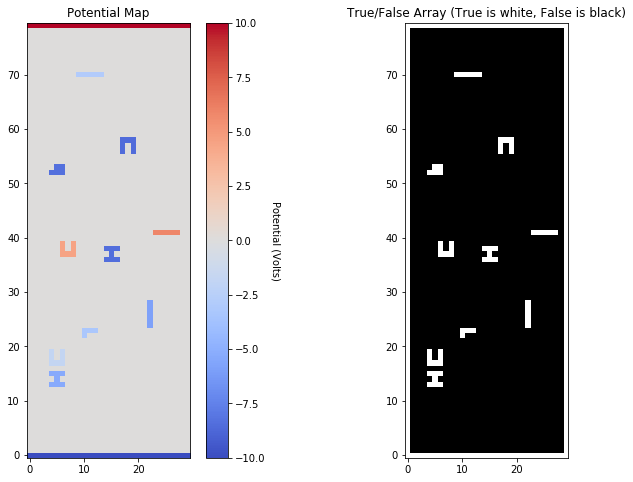

In [44]:
def cArysPore(x,y,Vn,Vp):
    V=np.zeros((x,y))
    TF=np.ones((x,y),dtype=bool)
    Fy=np.zeros((1,y),dtype=bool)
    Fx=np.zeros((1,x),dtype=bool)
    Vp=Vp*np.ones((1,y))
    Vn=Vn*np.ones((1,y))
    TF[0]=TF[x-1]=Fy
    TF.T[0]=TF.T[y-1]=Fx
    V[0]=Vn
    V[-1]=Vp
    return V,TF

def smArys(ind,rot,pot):
    if ind==0:
        A=[[pot,pot,0],[pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==1:
        A=[[pot,pot,pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==2:
        A=[[pot,pot,pot],[0,0,pot],[pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==3:
        A=[[pot,pot,pot,0,pot],[pot,0,pot,0,pot],[pot,0,pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==4:
        A=[[pot,pot,pot],[0,pot,pot],[0,0,pot]]
        return rota(np.array(A),rot)
    if ind==5:
        A=[[pot,0,pot],[pot,pot,pot],[pot,0,pot]]
        return rota(np.array(A),rot)
    if ind==6:
        A=[[0,pot],[0,pot],[pot,pot]]
        return rota(np.array(A),rot)
    return False
    
def rota(A,rot):
    for n in range(0,rot):
        A=np.rot90(A)
    return A

def insrt(xi,yi,A,V,TF):
    lx,ly=np.shape(A)
    if np.all(TF[xi:xi+lx,yi:yi+ly]==True):
        V[xi:xi+lx,yi:yi+ly]=A
        TF[xi:xi+lx,yi:yi+ly]=(A==0)
        return False
    else:
        return True
        
def genPore(x,y,nSmall,minPot,maxPot,Vn,Vp):
    V,TF=cArysPore(x,y,Vn,Vp)
    for n in range(nSmall):
        check=True
        while check:
            ind=rand.randint(0,6)
            rot=rand.randint(0,3)
            pot=rand.uniform(minPot,maxPot)
            A=smArys(ind,rot,pot)
            xi=rand.randint(0,x-1)
            yi=rand.randint(0,y-1)
            check=insrt(xi,yi,A,V,TF)
    TF=np.logical_not(TF)
    return V,TF

V,TF=genPore(80,30,10,-10,10,-10,10)
plt.figure(figsize=(13,8))
plt.subplot(121)
plt.title("Potential Map")
plt.imshow(V,cmap="coolwarm",origin='lower')
cbar=plt.colorbar()
cbar.set_label("Potential (Volts)", rotation=270,labelpad=15)
plt.subplot(122)
plt.title("True/False Array (True is white, False is black)")
plt.imshow(TF,cmap="gray",origin='lower');